# Predicting Single Family Homes Values in the Southern Neighborhoods of Staten Island

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import math

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('nyc-rolling-sales.csv')

#Borough 1 = Manhattan, 2 = Bronx, 3 = Brooklyn, 4 = Queens, 5= Staten Island
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
data.shape

(84548, 22)

In [4]:
#convert Sale Price, Gross Sq Ft, Land Sq Ft to integer
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')

In [5]:
#remove NAN from above
data=data.dropna()

In [6]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00


In [7]:
Filter1 =  data['BOROUGH']==5 #Staten Island
Filter2 = data['SALE PRICE'] >= 10000 #Filter down Sales Price
Filter3 = data['SALE PRICE'] < 1000000
Filter4 = data['GROSS SQUARE FEET'] < 5000 #Filter down house gross sf

Filter_BldgClassCat = data['BUILDING CLASS CATEGORY'].str.contains('01') #filters to keep only single family dwellings

data_filtered = data[Filter1 & Filter2 & Filter3 & Filter4]
data_filtered2 = data_filtered[Filter_BldgClassCat]


C:\Users\mvesc\AppData\Local\Temp/ipykernel_34644/3036627384.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_filtered2 = data_filtered[Filter_BldgClassCat]


In [8]:
data_filtered2['NEIGHBORHOOD'].unique()

array(['ANNADALE', 'ARDEN HEIGHTS', 'ARROCHAR', 'ARROCHAR-SHORE ACRES',
       'BULLS HEAD', 'CASTLETON CORNERS', 'CLOVE LAKES', 'CONCORD',
       'CONCORD-FOX HILLS', 'DONGAN HILLS', 'DONGAN HILLS-COLONY',
       'DONGAN HILLS-OLD TOWN', 'ELTINGVILLE', 'EMERSON HILL',
       'FRESH KILLS', 'GRANT CITY', 'GRASMERE', 'GREAT KILLS',
       'GREAT KILLS-BAY TERRACE', 'GRYMES HILL', 'HUGUENOT', 'LIVINGSTON',
       'MANOR HEIGHTS', 'MARINERS HARBOR', 'MIDLAND BEACH',
       'NEW BRIGHTON', 'NEW DORP', 'NEW DORP-BEACH', 'NEW DORP-HEIGHTS',
       'NEW SPRINGVILLE', 'OAKWOOD', 'OAKWOOD-BEACH', 'PLEASANT PLAINS',
       'PORT IVORY', 'PORT RICHMOND', 'PRINCES BAY', 'RICHMONDTOWN',
       'RICHMONDTOWN-LIGHTHS HILL', 'ROSEBANK', 'ROSSVILLE',
       'ROSSVILLE-CHARLESTON', 'ROSSVILLE-RICHMOND VALLEY', 'SILVER LAKE',
       'SOUTH BEACH', 'STAPLETON', 'STAPLETON-CLIFTON', 'SUNNYSIDE',
       'TODT HILL', 'TOMPKINSVILLE', 'TOTTENVILLE', 'TRAVIS',
       'WEST NEW BRIGHTON', 'WESTERLEIGH', 'WILLOW

In [9]:
nbhood_south = ['TOTTENVILLE', 'ROSSVILLE', 'PLEASANT PLAINS', 'PRINCES BAY', 'ANNADALE'] 

In [10]:
data_ready_filt = data_filtered2[data['NEIGHBORHOOD'].isin(nbhood_south)] #fitler to only selected neighborhoods
data_ready_filt=data_ready_filt.dropna()
data_ready_filt.head()

C:\Users\mvesc\AppData\Local\Temp/ipykernel_34644/2382480762.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_ready_filt = data_filtered2[data['NEIGHBORHOOD'].isin(nbhood_south)] #fitler to only selected neighborhoods


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76139,5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,22,,A5,83 EAGAN AVENUE,,10312,1,0,1,1546.0,1579.0,1986,1,A5,437500.0,2017-05-30 00:00:00
76141,7,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209,69,,A5,195 MOSELY AVENUE,,10312,1,0,1,2665.0,1592.0,2007,1,A5,579000.0,2016-11-21 00:00:00
76143,9,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,15,,A5,17 EAGAN AVENUE,,10312,1,0,1,1508.0,1521.0,1986,1,A5,370000.0,2016-10-14 00:00:00
76144,10,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,34,,A5,100 SEGUINE PLACE,,10312,1,0,1,1550.0,1521.0,1986,1,A5,439000.0,2017-06-29 00:00:00
76145,11,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,40,,A5,92 SEGUINE PLACE,,10312,1,0,1,1800.0,1320.0,1986,1,A5,300000.0,2017-06-30 00:00:00


In [11]:
#drop cols that provide no value for linear regression
data_ready = data_ready_filt.drop(columns=['SALE DATE','TAX CLASS AT TIME OF SALE','Unnamed: 0','BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'BOROUGH', 'BUILDING CLASS AT PRESENT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS'])
print(data_ready.shape)
data_ready.head()

(286, 9)


,NEIGHBORHOOD,BLOCK,LOT,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE
76139,ANNADALE,6205,22,10312,1546.0,1579.0,1986,A5,437500.0
76141,ANNADALE,6209,69,10312,2665.0,1592.0,2007,A5,579000.0
76143,ANNADALE,6211,15,10312,1508.0,1521.0,1986,A5,370000.0
76144,ANNADALE,6211,34,10312,1550.0,1521.0,1986,A5,439000.0
76145,ANNADALE,6211,40,10312,1800.0,1320.0,1986,A5,300000.0


## End of Data Cleaning

## TRIAL 0

In [12]:
cols = data_ready.columns.to_list()

In [13]:
X=data_ready[['LAND SQUARE FEET', 'GROSS SQUARE FEET']]
y=data_ready['SALE PRICE']

In [14]:
#test-train split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)
X_train.head()

,LAND SQUARE FEET,GROSS SQUARE FEET
83278,744.0,832.0
82351,2779.0,1485.0
81890,6552.0,1656.0
82320,2386.0,1548.0
76178,5000.0,925.0


In [15]:
#Statsmodel linear regression model. Adding y intercept constant
X_train_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_c)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     102.8
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           6.97e-31
Time:                        14:28:30   Log-Likelihood:                -2499.3
No. Observations:                 191   AIC:                             5005.
Df Residuals:                     188   BIC:                             5014.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.278e+05   2.34e+04      9.752      0.000    1.82e+05    2.74e+05
LAND SQUARE FEET     16.4690      3.034      5.428      0.000      10.484      22.454
GROSS SQUARE FEET   130.0659     14.457      8.997      0.000     101.547     158.585
==============================================================================
Omnibus:                       10.504   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.852
Skew:                          -0.445   Prob(JB):                      0.00267
Kurtosis:                       3.835   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X_test_c = sm.add_constant(X_test)
y_pred = result.predict(X_test_c)

In [17]:
#Root Mean Squared Estimate
RMSE = math.sqrt(mean_squared_error(y_true= y_test , y_pred=result.predict(X_test_c)))
RMSE

142218.42066800268

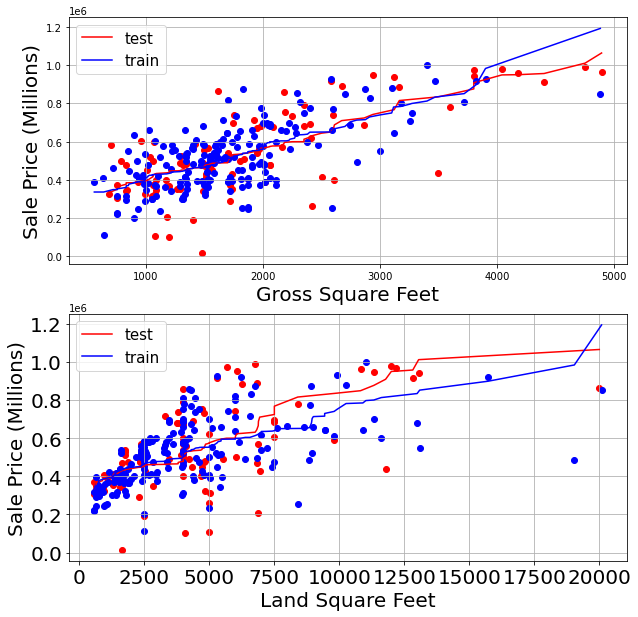

In [18]:
fig, ax = plt.subplots(2,1, figsize=(10, 10))
plt.xticks(ticks=None, labels=None, rotation=0)
plt.xticks(fontsize=20 ) 
plt.yticks(fontsize=20 ) 


plt.subplot(2,1,1)

plt.plot(X_test_c['GROSS SQUARE FEET'].sort_values(), result.predict(X_test_c).sort_values(), color='r', label="test")    
plt.scatter(X_test_c['GROSS SQUARE FEET'], y_test, color='r')
plt.plot(X_train_c['GROSS SQUARE FEET'].sort_values(), result.predict(X_train_c).sort_values(), color='b', label="train")
plt.scatter(X_train_c['GROSS SQUARE FEET'], y_train, color='b')

plt.ylabel('Sale Price (Millions)', fontsize=20)
plt.xlabel('Gross Square Feet', fontsize=20)

plt.legend(fontsize=15)
plt.grid(axis='both')



plt.subplot(2,1,2)
plt.plot(X_test_c['LAND SQUARE FEET'].sort_values(), result.predict(X_test_c).sort_values(), color='r', label="test") 
plt.scatter(X_test_c['LAND SQUARE FEET'], y_test, color='r')
plt.plot(X_train_c['LAND SQUARE FEET'].sort_values(), result.predict(X_train_c).sort_values(), color='b', label="train")   
plt.scatter(X_train_c['LAND SQUARE FEET'], y_train, color='b')

plt.ylabel('Sale Price (Millions)', fontsize=20)
plt.xlabel('Land Square Feet', fontsize=20)

plt.legend(fontsize=15)
plt.grid(axis='both')


eval_env: 1
eval_env: 1
eval_env: 1


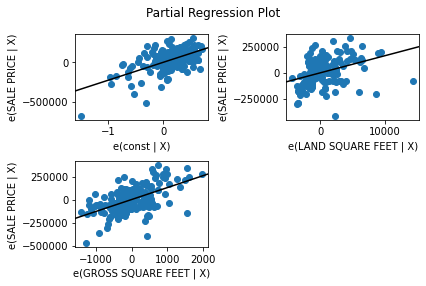

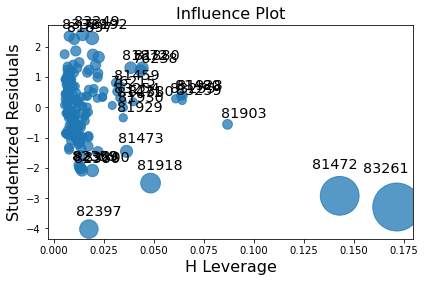

In [19]:
#plot partial regression and influence plots
sm.graphics.plot_partregress_grid(result).tight_layout(pad=1.0)
sm.graphics.influence_plot(result).tight_layout(pad=1.0)

In [20]:
data_ready.loc[[81472,83261,81903]]
#these 3 are outliers in the land square feet. See subplot 2 a few lines up
#need to remove Land Square Feet

,NEIGHBORHOOD,BLOCK,LOT,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE
81472,PLEASANT PLAINS,7550,80,10309,19040.0,1964.0,1899,A1,485000.0
83261,TOTTENVILLE,7836,1,10307,20088.0,4880.0,1988,A3,850000.0
81903,PRINCES BAY,6712,420,10309,15716.0,3820.0,1986,A3,920000.0


## TRIAL 2

In [21]:
#new analysis with just gross square feet vs sale price
X2=data_ready['GROSS SQUARE FEET']
y2=data_ready['SALE PRICE']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=324)
X2_train_c = sm.add_constant(X2_train)
model2 = sm.OLS(y2_train, X2_train_c)
result2 = model2.fit()
print(result2.summary())
X2_test_c = sm.add_constant(X2_test)

                            OLS Regression Results                            
Dep. Variable:             SALE PRICE   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     153.0
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           3.92e-26
Time:                        14:28:32   Log-Likelihood:                -2513.2
No. Observations:                 191   AIC:                             5030.
Df Residuals:                     189   BIC:                             5037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               2.31e+05   2.51e+0

In [22]:
RMSE2 = math.sqrt(mean_squared_error(y_true= y2_test , y_pred=result2.predict(X2_test_c)))
RMSE2

150002.229061408

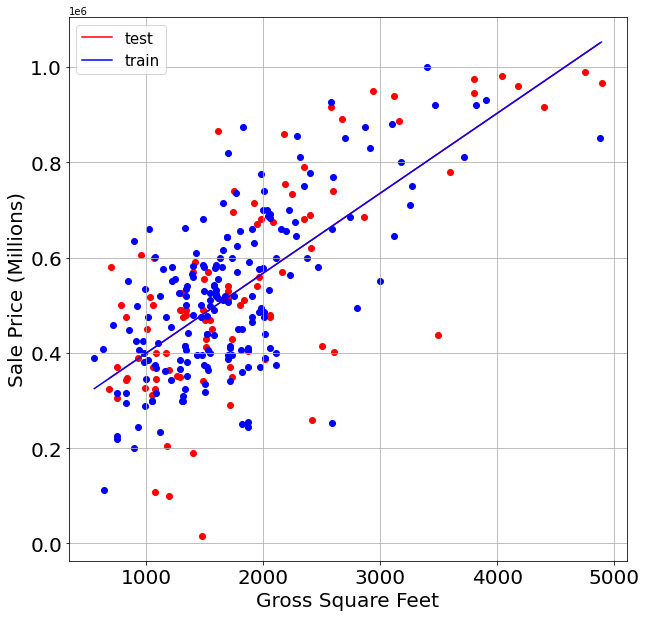

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
plt.xticks(ticks=None, labels=None, rotation=0)
plt.xticks(fontsize=20 ) 
plt.yticks(fontsize=20 ) 


plt.subplot(1,1,1)
plt.plot(X2_test_c['GROSS SQUARE FEET'].sort_values(), result2.predict(X2_test_c).sort_values(), color='r', label="test")
plt.scatter(X2_test_c['GROSS SQUARE FEET'], y2_test, color='r')
plt.plot(X2_train_c['GROSS SQUARE FEET'].sort_values(), result2.predict(X2_train_c).sort_values(), color='b', label="train")
plt.scatter(X2_train_c['GROSS SQUARE FEET'], y2_train, color='b')

plt.ylabel('Sale Price (Millions)', fontsize=20)
plt.xlabel('Gross Square Feet', fontsize=20)

plt.legend(fontsize=15)
plt.grid(axis='both')

eval_env: 1
eval_env: 1


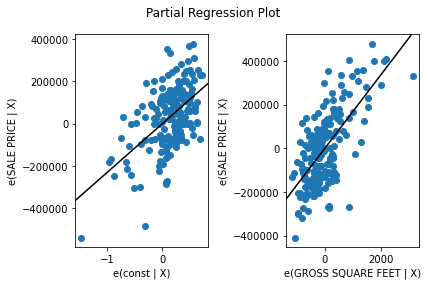

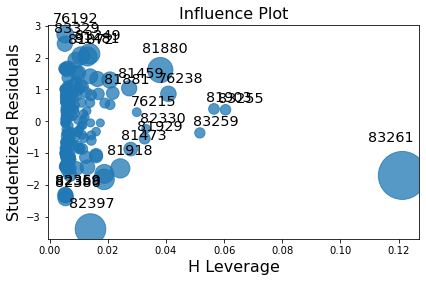

In [24]:
sm.graphics.plot_partregress_grid(result2).tight_layout(pad=1.0)
sm.graphics.influence_plot(result2).tight_layout(pad=1.0)

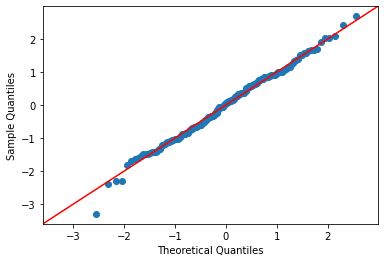

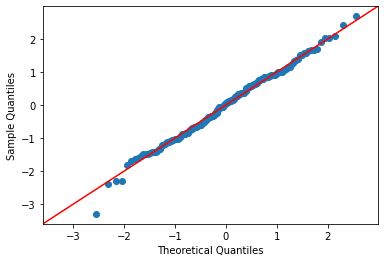

In [25]:
#Need QQ plot to analyze residuals. residuals need to be gaussian.
resid2 = result2.resid
sm.qqplot(resid2, fit=True, line='45')
#passes test

## TRIAL 1

In [26]:
#need to see how many unique values for categorical variables. IE block, lot, year built, etc
data_ready.nunique()

NEIGHBORHOOD                        5
BLOCK                             165
LOT                               145
ZIP CODE                            3
LAND SQUARE FEET                  205
GROSS SQUARE FEET                 196
YEAR BUILT                         50
BUILDING CLASS AT TIME OF SALE      7
SALE PRICE                        191
dtype: int64

In [27]:
#need to get dummies for cols: neightborhood, building class at time of sale, year built, lot, block, zip code
data_ready_dummy = pd.get_dummies(data_ready, columns=['NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE', 'YEAR BUILT', 'LOT', 'BLOCK', 'ZIP CODE'])
data_ready_dummy.head()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,NEIGHBORHOOD_ANNADALE,NEIGHBORHOOD_PLEASANT PLAINS,NEIGHBORHOOD_PRINCES BAY,NEIGHBORHOOD_ROSSVILLE,NEIGHBORHOOD_TOTTENVILLE,BUILDING CLASS AT TIME OF SALE_A0,BUILDING CLASS AT TIME OF SALE_A1,BUILDING CLASS AT TIME OF SALE_A2,BUILDING CLASS AT TIME OF SALE_A3,BUILDING CLASS AT TIME OF SALE_A5,BUILDING CLASS AT TIME OF SALE_A6,BUILDING CLASS AT TIME OF SALE_S1,YEAR BUILT_1899,YEAR BUILT_1901,YEAR BUILT_1905,YEAR BUILT_1910,YEAR BUILT_1915,YEAR BUILT_1920,YEAR BUILT_1925,YEAR BUILT_1928,YEAR BUILT_1930,YEAR BUILT_1935,YEAR BUILT_1940,YEAR BUILT_1941,YEAR BUILT_1945,YEAR BUILT_1950,YEAR BUILT_1955,YEAR BUILT_1960,YEAR BUILT_1965,YEAR BUILT_1970,YEAR BUILT_1975,YEAR BUILT_1977,YEAR BUILT_1980,YEAR BUILT_1982,YEAR BUILT_1983,YEAR BUILT_1984,YEAR BUILT_1985,YEAR BUILT_1986,YEAR BUILT_1987,YEAR BUILT_1988,YEAR BUILT_1989,YEAR BUILT_1990,YEAR BUILT_1991,YEAR BUILT_1992,YEAR BUILT_1993,YEAR BUILT_1994,YEAR BUILT_1995,YEAR BUILT_1996,YEAR BUILT_1997,YEAR BUILT_1998,YEAR BUILT_1999,YEAR BUILT_2000,YEAR BUILT_2001,YEAR BUILT_2002,YEAR BUILT_2003,YEAR BUILT_2004,YEAR BUILT_2005,YEAR BUILT_2007,YEAR BUILT_2008,YEAR BUILT_2009,YEAR BUILT_2014,YEAR BUILT_2015,LOT_1,LOT_3,LOT_4,LOT_5,LOT_6,LOT_7,LOT_8,LOT_9,LOT_10,LOT_11,LOT_12,LOT_13,LOT_14,LOT_15,LOT_16,LOT_17,LOT_18,LOT_19,LOT_20,LOT_21,LOT_22,LOT_24,LOT_25,LOT_27,LOT_28,LOT_29,LOT_30,LOT_31,LOT_32,LOT_33,LOT_34,LOT_35,LOT_36,LOT_37,LOT_38,LOT_39,LOT_40,LOT_41,LOT_42,LOT_43,LOT_44,LOT_45,LOT_46,LOT_47,LOT_49,LOT_50,LOT_51,LOT_52,LOT_53,LOT_54,LOT_55,LOT_56,LOT_57,LOT_58,LOT_59,LOT_60,LOT_61,LOT_62,LOT_63,LOT_64,LOT_65,LOT_66,LOT_67,LOT_69,LOT_70,LOT_72,LOT_73,LOT_74,LOT_75,LOT_76,LOT_77,LOT_79,LOT_80,LOT_83,LOT_85,LOT_87,LOT_88,LOT_89,LOT_90,LOT_91,LOT_92,LOT_93,LOT_96,LOT_97,LOT_98,LOT_100,LOT_102,LOT_105,LOT_106,LOT_109,LOT_110,LOT_111,LOT_112,LOT_113,LOT_114,LOT_115,LOT_116,LOT_118,LOT_125,LOT_126,LOT_127,LOT_130,LOT_134,LOT_136,LOT_140,LOT_148,LOT_149,LOT_150,LOT_156,LOT_160,LOT_161,LOT_162,LOT_165,LOT_166,LOT_168,LOT_173,LOT_174,LOT_180,LOT_186,LOT_188,LOT_195,LOT_200,LOT_203,LOT_220,LOT_221,LOT_226,LOT_234,LOT_248,LOT_278,LOT_286,LOT_293,LOT_310,LOT_318,LOT_320,LOT_324,LOT_327,LOT_343,LOT_353,LOT_408,LOT_420,LOT_486,LOT_515,LOT_516,LOT_524,LOT_526,BLOCK_6087,BLOCK_6106,BLOCK_6110,BLOCK_6155,BLOCK_6159,BLOCK_6164,BLOCK_6205,BLOCK_6209,BLOCK_6211,BLOCK_6212,BLOCK_6214,BLOCK_6215,BLOCK_6216,BLOCK_6219,BLOCK_6220,BLOCK_6221,BLOCK_6222,BLOCK_6226,BLOCK_6234,BLOCK_6235,BLOCK_6242,BLOCK_6244,BLOCK_6249,BLOCK_6261,BLOCK_6268,BLOCK_6271,BLOCK_6273,BLOCK_6278,BLOCK_6279,BLOCK_6280,BLOCK_6281,BLOCK_6299,BLOCK_6300,BLOCK_6301,BLOCK_6320,BLOCK_6321,BLOCK_6323,BLOCK_6352,BLOCK_6360,BLOCK_6361,BLOCK_6370,BLOCK_6373,BLOCK_6382,BLOCK_6398,BLOCK_6403,BLOCK_6441,BLOCK_6455,BLOCK_6456,BLOCK_6459,BLOCK_6651,BLOCK_6665,BLOCK_6666,BLOCK_6668,BLOCK_6670,BLOCK_6671,BLOCK_6675,BLOCK_6677,BLOCK_6681,BLOCK_6694,BLOCK_6700,BLOCK_6705,BLOCK_6708,BLOCK_6712,BLOCK_6721,BLOCK_6725,BLOCK_6726,BLOCK_6727,BLOCK_6728,BLOCK_6744,BLOCK_6749,BLOCK_6751,BLOCK_6760,BLOCK_6789,BLOCK_6793,BLOCK_6856,BLOCK_6858,BLOCK_6865,BLOCK_6896,BLOCK_6900,BLOCK_6943,BLOCK_6949,BLOCK_7037,BLOCK_7038,BLOCK_7040,BLOCK_7054,BLOCK_7055,BLOCK_7066,BLOCK_7067,BLOCK_7075,BLOCK_7080,BLOCK_7081,BLOCK_7082,BLOCK_7083,BLOCK_7084,BLOCK_7085,BLOCK_7086,BLOCK_7090,BLOCK_7420,BLOCK_7497,BLOCK_7499,BLOCK_7533,BLOCK_7534,BLOCK_7540,BLOCK_7550,BLOCK_7664,BLOCK_7702,BLOCK_7710,BLOCK_7755,BLOCK_7771,BLOCK_7775,BLOCK_7780,BLOCK_7812,BLOCK_7818,BLOCK_7826,BLOCK_7836,BLOCK_7853,BLOCK_7854,BLOCK_7859,BLOCK_7860,BLOCK_7861,BLOCK_7862,BLOCK_7863,BLOCK_7865,BLOCK_7866,BLOCK_7867,BLOCK_7880,BLOCK_7883,BLOCK_7886,BLOCK_7888,BLOCK_7890,BLOCK_7891,BLOCK_7892,BLOCK_7893,BLOCK_7895,BLOCK_7900,BLOCK_7906,BLOCK_7908,BLOCK_7911,BLOCK_7923,BLOCK_7925,BLOCK_7928,BLOCK_7932,BLOCK_7933,BLOCK_7939,BLOCK_7940,BLOCK_7943,BLOCK_7945,BLOCK_7964,BLOCK_7991,BLOCK_7997,BLOCK_7999,BLOCK_8001,BLOCK_8021,BLOCK_8022,BLOCK_8023,BLOCK_8025,BLOCK_80

In [28]:
cols_dummy = data_ready_dummy.columns
cols_dummy

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE',
       'NEIGHBORHOOD_ANNADALE', 'NEIGHBORHOOD_PLEASANT PLAINS',
       'NEIGHBORHOOD_PRINCES BAY', 'NEIGHBORHOOD_ROSSVILLE',
       'NEIGHBORHOOD_TOTTENVILLE', 'BUILDING CLASS AT TIME OF SALE_A0',
       'BUILDING CLASS AT TIME OF SALE_A1',
       ...
       'BLOCK_8037', 'BLOCK_8041', 'BLOCK_8042', 'BLOCK_8043', 'BLOCK_8045',
       'BLOCK_8046', 'BLOCK_8049', 'ZIP CODE_10307', 'ZIP CODE_10309',
       'ZIP CODE_10312'],
      dtype='object', length=378)

In [29]:
X1_cols = []
for col in cols_dummy[0:2]:
    X1_cols.append(col)

for col in cols_dummy[3:]:
    X1_cols.append(col)
    
y1_cols = cols_dummy[2]

X1=data_ready_dummy[X1_cols]
y1=data_ready_dummy[y1_cols]

In [30]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=324)
X1_train_c = sm.add_constant(X1_train)
model1 = sm.OLS(y1_train, X1_train_c)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     4.491
Date:                Sat, 26 Feb 2022   Prob (F-statistic):              0.119
Time:                        14:28:34   Log-Likelihood:                -2031.4
No. Observations:                 191   AIC:                             4439.
Df Residuals:                       3   BIC:                             5050.
Df Model:                         187                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1.476e+05   2.69e+04      5.480      0.012    6.19e+04    2.33e+05
LAND SQUARE FEET                      6.9134      5.539      1.248      0.301     -10.715      24.542
GROSS SQUARE FEET                   120.8147     21.192      5.701      0.011      53.372     188.257
NEIGHBORHOOD_ANNADALE              -3.01e+04   3.36e+04     -0.895      0.437   -1.37e+05    7.69e+04
NEIGHBORHOOD_PLEASANT PLAINS         4.4e+04   2.65e+04      1.663      0.195   -4.02e+04    1.28e+05
NEIGHBORHOOD_PRINCES BAY           6.724e+04   2.33e+04      2.883      0.063   -6996.209    1.41e+05
NEIGHBORHOOD_ROSSVILLE             2.871e+04   2.31e+04      1.245      0.301   -4.47e+04    1.02e+05
NEIGHBORHOOD_TOTTENVILLE            3.77e+04   1.09e+04      3.445      0.041    2877.035    7.25e+04
BUILDING CLASS AT TIME OF SALE_A0   -1.4e+04    3.2e+04     -0.438      0.691   -1.16e+05    8.78e+04
BUILDING CLASS AT TIME OF SALE_A1  1.155e+05   2.11e+04      5.466      0.012    4.83e+04    1.83e+05
BUILDING CLASS AT TIME OF SALE_A2  4.038e+04   2.92e+04      1.384      0.260   -5.25e+04    1.33e+05
BUILDING CLASS AT TIME OF SALE_A3 -6.578e+04   4.97e+04     -1.324      0.277   -2.24e+05    9.23e+04
BUILDING CLASS AT TIME OF SALE_A5  5.371e+04   2.48e+04      2.166      0.119   -2.52e+04    1.33e+05
BUILDING CLASS AT TIME OF SALE_A6  4.816e+04   3.57e+04      1.347      0.271   -6.56e+04    1.62e+05
BUILDING CLASS AT TIME OF SALE_S1 -3.044e+04    4.9e+04     -0.622      0.578   -1.86e+05    1.25e+05
YEAR BUILT_1899                    8.288e+04   7.11e+04      1.166      0.328   -1.43e+05    3.09e+05
YEAR BUILT_1901                   -2.377e+05   4.71e+04     -5.047      0.015   -3.88e+05   -8.78e+04
YEAR BUILT_1905                   -3.889e+04   3.75e+04     -1.037      0.376   -1.58e+05    8.05e+04
YEAR BUILT_1910                   -1.745e+05   4.87e+04     -3.585      0.037   -3.29e+05   -1.96e+04
YEAR BUILT_1915                   -1.122e+05   7.54e+04     -1.487      0.234   -3.52e+05    1.28e+05
YEAR BUILT_1920                    9391.2044   5.01e+04      0.187      0.863    -1.5e+05    1.69e+05
YEAR BUILT_1925                   -4.951e+04   4.28e+04     -1.158      0.331   -1.86e+05    8.66e+04
YEAR BUILT_1928                   -1.832e+04   2.68e+04     -0.684      0.543   -1.04e+05    6.69e+04
YEAR BUILT_1930                   -7.247e+04   4.91e+04     -1.475      0.237   -2.29e+05    8.39e+04
YEAR BUILT_1935                   -2.139e+04   3.13e+04     -0.683      0.543   -1.21e+05    7.82e+04
YEAR BUILT_1940                    7068.5827    4.6e+04      0.154      0.888   -1.39e+05    1.53e+05
YEAR BUILT_1941                   -1.143e+05   3.91e+04     -2.924      0.061   -2.39e+05    1.01e+04
YEAR BUILT_1945        

In [31]:
X1_test_c = sm.add_constant(X1_test)

In [32]:
RMSE1 = math.sqrt(mean_squared_error(y_true= y1_test , y_pred=result1.predict(X1_test_c)))
RMSE1

159388.98466624302

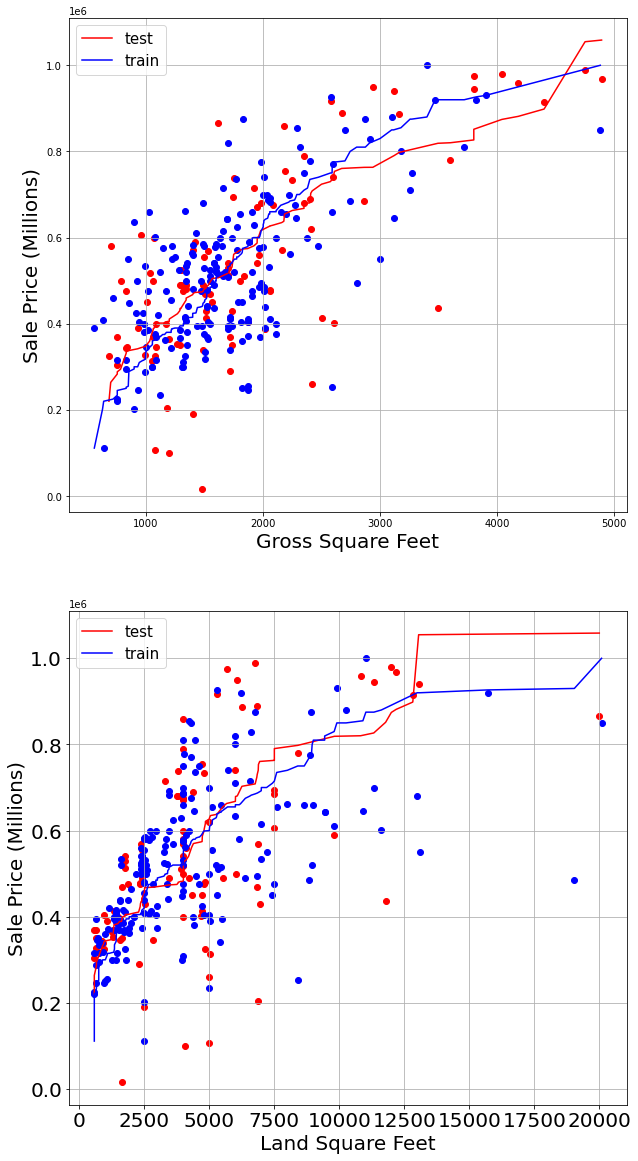

In [33]:
fig, ax = plt.subplots(2,1, figsize=(10, 20))
plt.xticks(ticks=None, labels=None, rotation=0)
plt.xticks(fontsize=20 ) 
plt.yticks(fontsize=20 ) 


plt.subplot(2,1,1)
plt.plot(X1_test_c['GROSS SQUARE FEET'].sort_values(), result1.predict(X1_test_c).sort_values(), color='r', label="test")
plt.scatter(X1_test_c['GROSS SQUARE FEET'], y1_test, color='r')
plt.plot(X1_train_c['GROSS SQUARE FEET'].sort_values(), result1.predict(X1_train_c).sort_values(), color='b', label="train")     
plt.scatter(X1_train_c['GROSS SQUARE FEET'], y1_train, color='b')

plt.ylabel('Sale Price (Millions)', fontsize=20)
plt.xlabel('Gross Square Feet', fontsize=20)
plt.legend(fontsize=15)
plt.grid(axis='both')


plt.subplot(2,1,2)
plt.plot(X1_test_c['LAND SQUARE FEET'].sort_values(), result1.predict(X1_test_c).sort_values(), color='r', label="test")     
plt.scatter(X1_test_c['LAND SQUARE FEET'], y1_test, color='r')
plt.plot(X1_train_c['LAND SQUARE FEET'].sort_values(), result1.predict(X1_train_c).sort_values(), color='b', label="train")      
plt.scatter(X1_train_c['LAND SQUARE FEET'], y1_train, color='b')

plt.ylabel('Sale Price (Millions)', fontsize=20)
plt.xlabel('Land Square Feet', fontsize=20)
plt.legend(fontsize=15)
plt.grid(axis='both')

In [34]:
#not enough sample sizes in data for Year_Built, Lot, Block to make any conclusions. Appears to be in some only 1-3 values

## TRIAL 3

In [35]:
#KEEPS: all neighborhoods, zip codes, 'BUILDING CLASS AT TIME OF SALE', 'GROSS SQUARE FEET' 
data_ready3 = data_ready.drop(columns=['BLOCK', 'LOT', 'YEAR BUILT'])
data_ready3_dummy = pd.get_dummies(data_ready3, columns=['NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE', 'ZIP CODE'])
data_ready3_dummy.head()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,NEIGHBORHOOD_ANNADALE,NEIGHBORHOOD_PLEASANT PLAINS,NEIGHBORHOOD_PRINCES BAY,NEIGHBORHOOD_ROSSVILLE,NEIGHBORHOOD_TOTTENVILLE,BUILDING CLASS AT TIME OF SALE_A0,BUILDING CLASS AT TIME OF SALE_A1,BUILDING CLASS AT TIME OF SALE_A2,BUILDING CLASS AT TIME OF SALE_A3,BUILDING CLASS AT TIME OF SALE_A5,BUILDING CLASS AT TIME OF SALE_A6,BUILDING CLASS AT TIME OF SALE_S1,ZIP CODE_10307,ZIP CODE_10309,ZIP CODE_10312
76139,1546.0,1579.0,437500.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
76141,2665.0,1592.0,579000.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
76143,1508.0,1521.0,370000.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
76144,1550.0,1521.0,439000.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
76145,1800.0,1320.0,300000.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [36]:
cols3_dummy = data_ready3_dummy.columns
cols3_dummy

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE',
       'NEIGHBORHOOD_ANNADALE', 'NEIGHBORHOOD_PLEASANT PLAINS',
       'NEIGHBORHOOD_PRINCES BAY', 'NEIGHBORHOOD_ROSSVILLE',
       'NEIGHBORHOOD_TOTTENVILLE', 'BUILDING CLASS AT TIME OF SALE_A0',
       'BUILDING CLASS AT TIME OF SALE_A1',
       'BUILDING CLASS AT TIME OF SALE_A2',
       'BUILDING CLASS AT TIME OF SALE_A3',
       'BUILDING CLASS AT TIME OF SALE_A5',
       'BUILDING CLASS AT TIME OF SALE_A6',
       'BUILDING CLASS AT TIME OF SALE_S1', 'ZIP CODE_10307', 'ZIP CODE_10309',
       'ZIP CODE_10312'],
      dtype='object')

In [37]:
#setting up dependent and independent variables for this trial
#remove 1 from each 'dummy' variable to avoid dummy trap
X3_cols = ['LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'NEIGHBORHOOD_ANNADALE', 'NEIGHBORHOOD_PRINCES BAY', 'NEIGHBORHOOD_ROSSVILLE',
       'NEIGHBORHOOD_TOTTENVILLE', 'BUILDING CLASS AT TIME OF SALE_A0',
       'BUILDING CLASS AT TIME OF SALE_A1',
       'BUILDING CLASS AT TIME OF SALE_A2',
       'BUILDING CLASS AT TIME OF SALE_A3',
       'BUILDING CLASS AT TIME OF SALE_A5',
       'BUILDING CLASS AT TIME OF SALE_A6', 'ZIP CODE_10309',
       'ZIP CODE_10312']


y3_cols = cols3_dummy[2]
print(X3_cols)
print(y3_cols)

X3=data_ready_dummy[X3_cols]
y3=data_ready_dummy[y3_cols]

['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'NEIGHBORHOOD_ANNADALE', 'NEIGHBORHOOD_PRINCES BAY', 'NEIGHBORHOOD_ROSSVILLE', 'NEIGHBORHOOD_TOTTENVILLE', 'BUILDING CLASS AT TIME OF SALE_A0', 'BUILDING CLASS AT TIME OF SALE_A1', 'BUILDING CLASS AT TIME OF SALE_A2', 'BUILDING CLASS AT TIME OF SALE_A3', 'BUILDING CLASS AT TIME OF SALE_A5', 'BUILDING CLASS AT TIME OF SALE_A6', 'ZIP CODE_10309', 'ZIP CODE_10312']
SALE PRICE


In [38]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=324)
X3_train_c = sm.add_constant(X3_train)
model3 = sm.OLS(y3_train, X3_train_c)
result3 = model3.fit()
X3_test_c = sm.add_constant(X3_test)
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     21.49
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           5.94e-30
Time:                        14:28:35   Log-Likelihood:                -2479.3
No. Observations:                 191   AIC:                             4987.
Df Residuals:                     177   BIC:                             5032.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1.905e+04   6.81e+04      0.280      0.780   -1.15e+05    1.53e+05
LAND SQUARE FEET                     11.8631      4.151      2.858      0.005       3.671      20.055
GROSS SQUARE FEET                   136.6987     16.902      8.088      0.000     103.343     170.054
NEIGHBORHOOD_ANNADALE             -6.549e+04   6.55e+04     -1.000      0.319   -1.95e+05    6.37e+04
NEIGHBORHOOD_PRINCES BAY           9794.0513   3.28e+04      0.298      0.766    -5.5e+04    7.46e+04
NEIGHBORHOOD_ROSSVILLE            -3.617e+04   3.31e+04     -1.093      0.276   -1.01e+05    2.91e+04
NEIGHBORHOOD_TOTTENVILLE          -3.801e+04   3.14e+04     -1.210      0.228      -1e+05     2.4e+04
BUILDING CLASS AT TIME OF SALE_A0  2.524e+05   1.39e+05      1.816      0.071   -2.19e+04    5.27e+05
BUILDING CLASS AT TIME OF SALE_A1  2.835e+05   7.99e+04      3.546      0.001    1.26e+05    4.41e+05
BUILDING CLASS AT TIME OF SALE_A2  2.407e+05   8.41e+04      2.862      0.005    7.47e+04    4.07e+05
BUILDING CLASS AT TIME OF SALE_A3   1.72e+05   9.46e+04      1.819      0.071   -1.46e+04    3.59e+05
BUILDING CLASS AT TIME OF SALE_A5  2.168e+05   8.07e+04      2.688      0.008    5.76e+04    3.76e+05
BUILDING CLASS AT TIME OF SALE_A6  2.735e+05   1.14e+05      2.405      0.017    4.91e+04    4.98e+05
ZIP CODE_10309                    -2.123e+04   2.82e+04     -0.752      0.453    -7.7e+04    3.45e+04
ZIP CODE_10312                     7.829e+04   5.05e+04      1.550      0.123   -2.14e+04    1.78e+05
==============================================================================
Omnibus:                        0.514   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.655
Skew:                          -0.080   Prob(JB):                        0.721
Kurtosis:                       2.762   Cond. No.                     1.81e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
#RMSE
RMSE3 = math.sqrt(mean_squared_error(y_true= y3_test , y_pred=result3.predict(X3_test_c)))
RMSE3

137458.1061083685

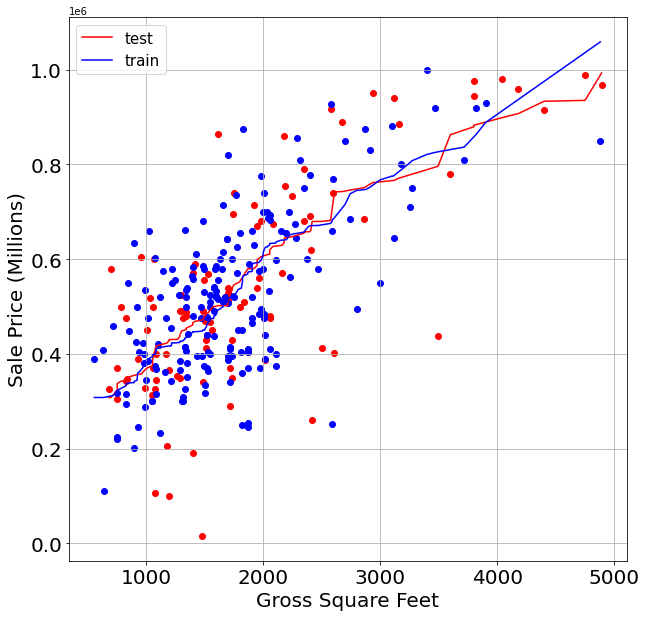

In [40]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
plt.xticks(ticks=None, labels=None, rotation=0)
plt.xticks(fontsize=20 ) 
plt.yticks(fontsize=20 ) 


plt.subplot(1,1,1)
plt.plot(X3_test_c['GROSS SQUARE FEET'].sort_values(), result3.predict(X3_test_c).sort_values(), color='r', label="test")
plt.scatter(X3_test_c['GROSS SQUARE FEET'], y3_test, color='r')
plt.plot(X3_train_c['GROSS SQUARE FEET'].sort_values(), result3.predict(X3_train_c).sort_values(), color='b', label="train")     
plt.scatter(X3_train_c['GROSS SQUARE FEET'], y3_train, color='b')

plt.ylabel('Sale Price (Millions)', fontsize=20)
plt.xlabel('Gross Square Feet', fontsize=20)
plt.legend(fontsize=15)
plt.grid(axis='both')


In [41]:
#Compare Observed Values vs Fitted Values
#for i in X3.columns:
#    sm.graphics.plot_fit(result3,i)

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


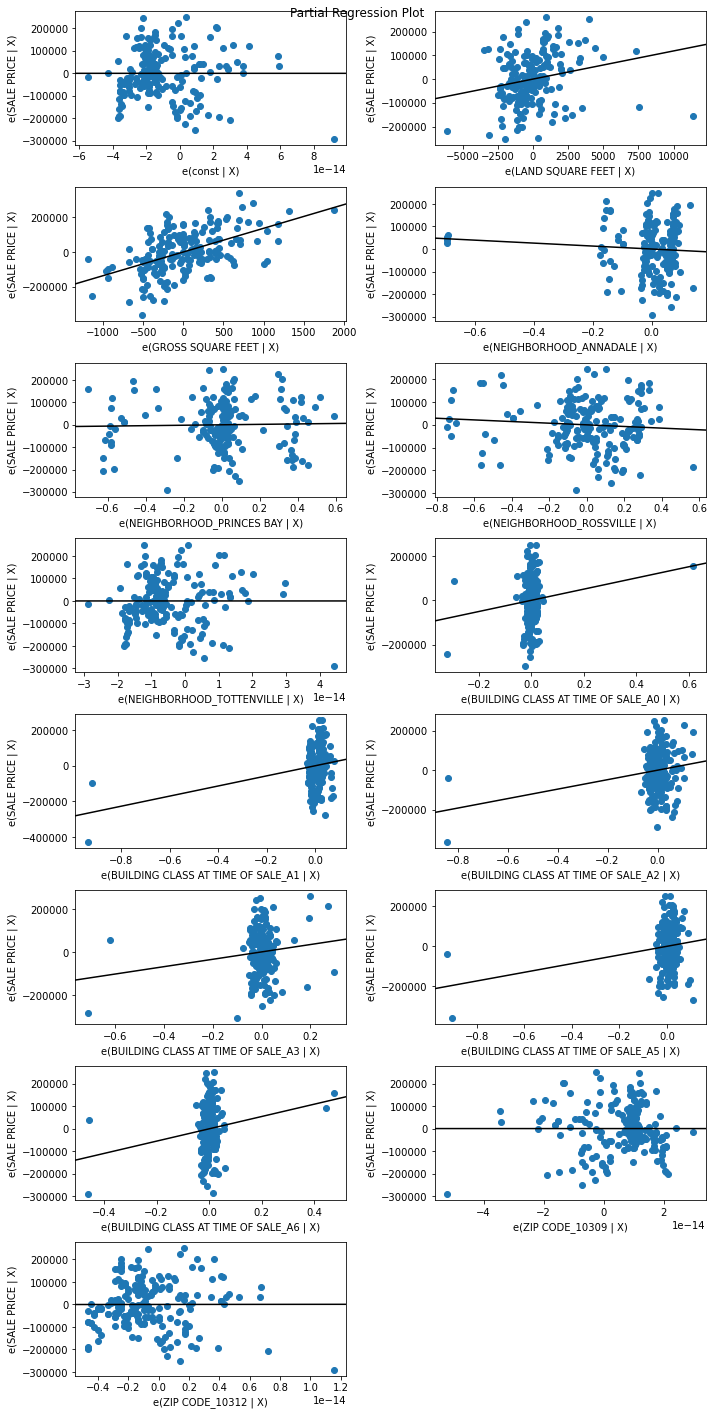

In [42]:
#breakout to see which regressors are most significant
fig=plt.figure(figsize=(10,20))
sm.graphics.plot_partregress_grid(result3, fig=fig).tight_layout(pad=1.0)

eval_env: 1


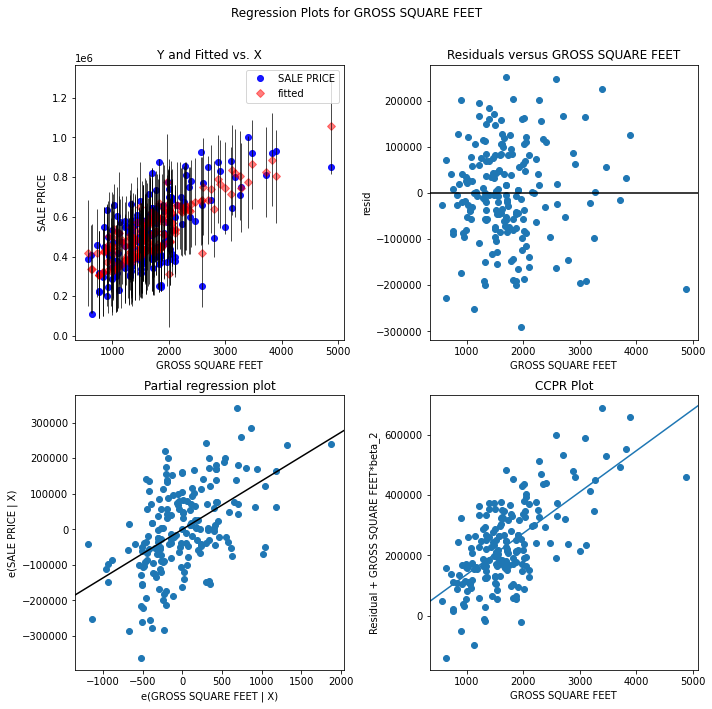

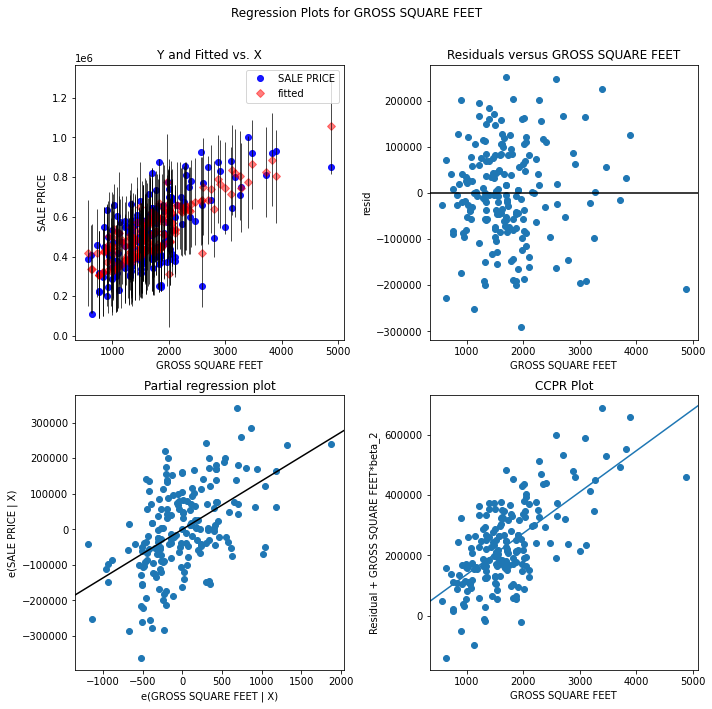

In [43]:
#only variable with linear correlation from above is gross sf
#check all regression plots for gross sf
fig=plt.figure(figsize=(10,10))
sm.graphics.plot_regress_exog(result3, "GROSS SQUARE FEET", fig=fig)

Independent Variables Used

TRIAL 0 : Land sf and Gross sf

TRIAL 1 : All independents

TRIAL 2 : Gross sf

TRIAL 3 : Gross sf, Land sf, Neighborhood, Zip Code, Bldg Class

In [44]:
print('Trial 0: RSME' ,RMSE, 'Adj R2:', result.rsquared_adj,'\n', 
      'Trial 1: RSME' ,RMSE1, 'Adj R2:', result1.rsquared_adj,'\n',
      'Trial 2: RSME' ,RMSE2, 'Adj R2:', result2.rsquared_adj,'\n',
      'Trial 3: RSME' ,RMSE3, 'Adj R2:', result3.rsquared_adj,'\n',
      )

Trial 0: RSME 142218.42066800268 Adj R2: 0.5171877587862499 
 Trial 1: RSME 159388.98466624302 Adj R2: 0.7745783904252659 
 Trial 2: RSME 150002.229061408 Adj R2: 0.4444656591352353 
 Trial 3: RSME 137458.1061083685 Adj R2: 0.5836951336188692 



## Results:
-Although Trial 1 had the highest R2, it also had the highest RSME --> overfit

-Trail 3 had the lowest RSME --> therefore, best model in group. results are still overall poor. 
My hypothesis is too many variables specific to each house (IE number of bedrooms or bathrooms etc) are missing to create a better performing model.